# Assignment 1


---


Samarth Kumar

Import Dependencies

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

## **Question 1**

Load Data

In [3]:
# Load the data.
X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

# X variable must be 2D vector.
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Print the shapes to verify.
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (100, 1)
y_train shape: (100,)
X_test shape: (100, 1)
y_test shape: (100,)


Plot the relationship of the orignal data.

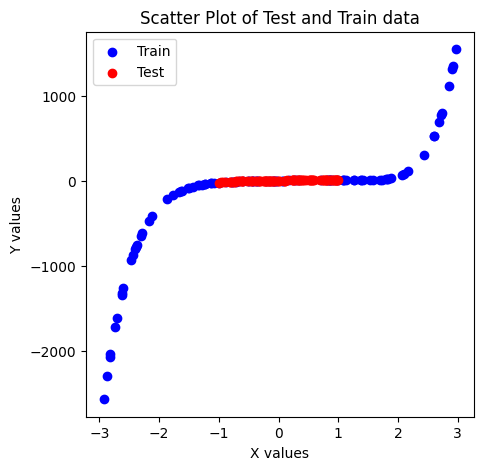

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot of Test and Train data')
plt.legend(['Train', 'Test'])
plt.show()

Plot the relationship between test and train data

### Implement simple Linear Regression (using Normal equation)

In [5]:
class LinearRegression():

  def __init__(self):
    self.weights = None
    self.bias = None

  def train(self, X, y):
    m = X.shape[0]
    # Augment X_train with a column of ones (for the intercept)
    X_aug = np.c_[np.ones((m, 1)), X]  # shape: (m, n_features+1)

    # Normal equation:
    xTx = np.dot(X_aug.T, X_aug)
    xTy = np.dot(X_aug.T, y)
    theta = np.linalg.inv(xTx).dot(xTy)

    # The first parameter is the bias (intercept) and the rest are the weights.
    self.bias = theta[0]
    self.weights = theta[1:]

  # Create predictions
  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

  # Calculate loss (mean squared error)
  def mean_squared_error(self, y, y_pred):
    return np.mean((y - y_pred) ** 2)

Run this model with the data

In [6]:
# Instantiate and train the model using the normal equation.
model = LinearRegression()
model.train(X_train, y_train)

# Make predictions on the training and test data.
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# Compute the Mean Squared Error (MSE) for training and testing data.
mse_train = model.mean_squared_error(y_train, y_train_pred)
mse_test  = model.mean_squared_error(y_test, y_test_pred)

# Print the Mean Squared Error (MSE) Values
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

# Print out the linear equation.
print("Linear Equation: y = {:.4f} + {:.4f}x".format(model.bias, model.weights[0]))

Mean Squared Error (Train): 172822.60339569923
Mean Squared Error (Test): 35281.339904469234
Linear Equation: y = -106.1738 + 300.6195x


Plot the results for the simple Linear Regression model

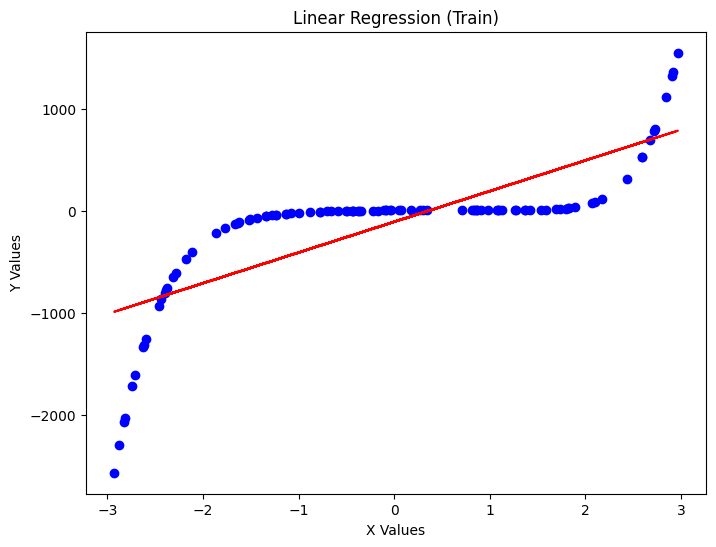

In [7]:
# Train
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_train_pred, color='red')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Linear Regression (Train)')
plt.show()

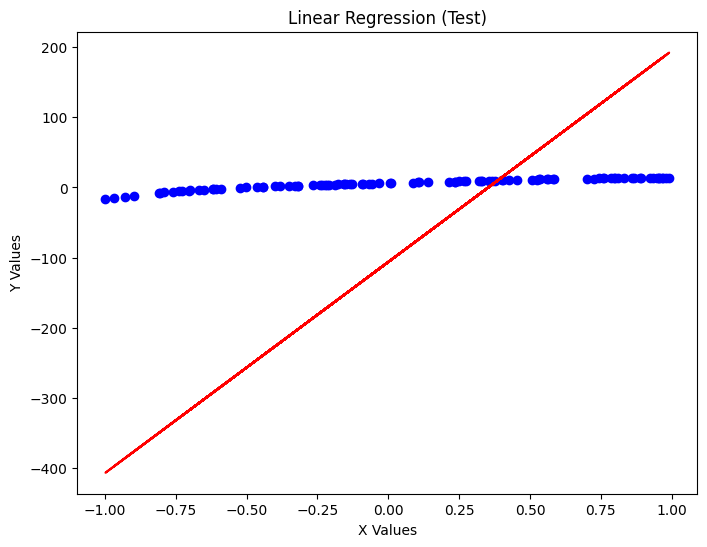

In [8]:
# Test
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_test_pred, color='red')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Linear Regression (Test)')
plt.show()

1a) As shown from the graph above, the relationship is not linear.

1b) Due to the nonlinear relationship, feature engineering for nonlinearity is necessary.

*   i) The nonlinear transformations would be applied to the training data for determining the best fit line, which would then be used on the testing data, which would also have the transformation applied to it.
*   ii) Exponential functions (quadratic, cubic, and so on).

Using a basic linear regression model, it's clear that the line does not fit the data well, so applying a nonlinear transformation to the data is crucial.

## Polynomial Regression (for Nonlinearity)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
        self.weights = None
        self.bias = None

    def train(self, X, y):
        m = X.shape[0]
        # Create a Vandermonde matrix for X with powers from 0 up to 'degree'
        X_poly = np.ones((m, self.degree + 1))
        for d in range(1, self.degree + 1):
            X_poly[:, d] = X[:, 0] ** d

        # Using normal equations for updating theta.
        xTx = X_poly.T.dot(X_poly)
        xTy = X_poly.T.dot(y)
        theta = np.linalg.inv(xTx).dot(xTy)
        return theta

    # Define a prediction function for polynomial regression
    def predict(self, X, theta):
        # Ensure X_new is 2D
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        degree = len(theta) - 1
        X_poly = np.ones((len(X), degree + 1))
        for d in range(1, degree + 1):
            X_poly[:, d] = X[:, 0] ** d
        y_pred = X_poly.dot(theta)
        return y_pred

    # Calculate loss (mean squared error)
    def mean_squared_error(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)

### Test the Polynomial Regression model for different degrees

#### 3rd degree

In [14]:
degree=3
polynomial_model = PolynomialRegression(degree)
theta = polynomial_model.train(X_train, y_train)

# Generate predictions for polynomial regression on training data
X_min_train, X_max_train = X_train.min(), X_train.max()
X_poly_train = np.linspace(X_min_train, X_max_train, 100).reshape(-1, 1)
pred_poly_train = polynomial_model.predict(X_poly_train, theta)

# Generate predictions for polynomial regression on test data
X_min_test, X_max_test = X_test.min(), X_test.max()
X_poly_test = np.linspace(X_min_test, X_max_test, 100).reshape(-1, 1)
pred_poly_test = polynomial_model.predict(X_poly_test, theta)

print("Polynomial Equation (Degree = {}) - ".format(degree), theta)

Polynomial Equation (Degree = 3) -  [  42.24281532 -182.75905104  -53.55471425   86.31922391]


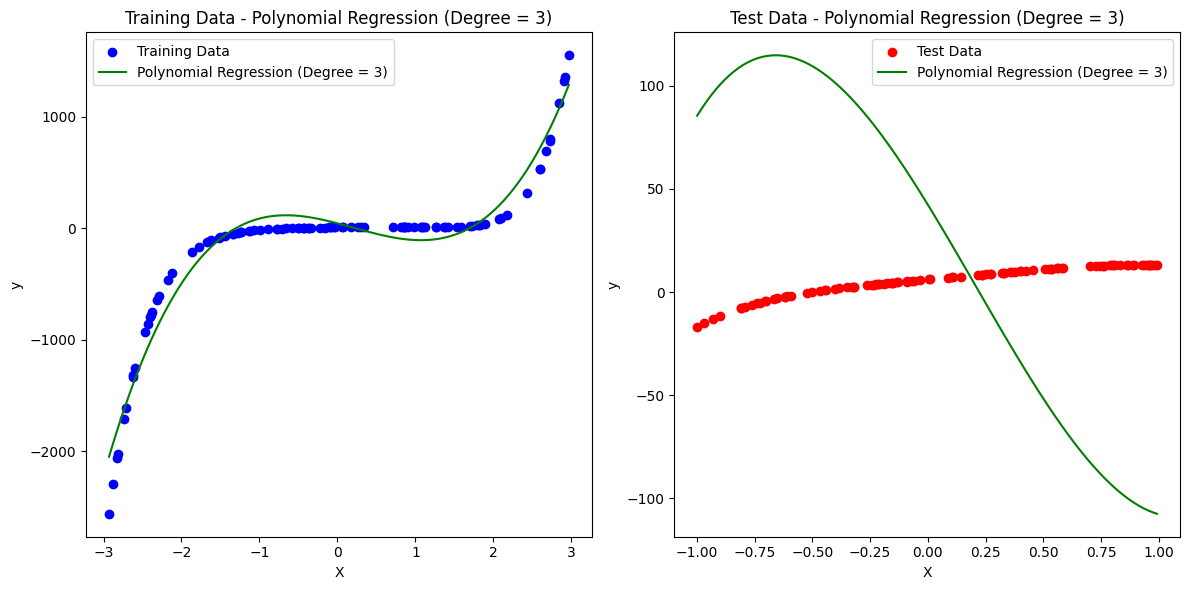

In [15]:
plt.figure(figsize=(12, 6))

# Plot training data with polynomial regression fit
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_poly_train, pred_poly_train, "g-",
         label='Polynomial Regression (Degree = {})'.format(degree))
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data - Polynomial Regression (Degree = {})".format(degree))
plt.legend()

# Plot test data with polynomial regression fit
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_poly_test, pred_poly_test, "g-",
         label='Polynomial Regression (Degree = {})'.format(degree))
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test Data - Polynomial Regression (Degree = {})".format(degree))
plt.legend()

plt.tight_layout()
plt.show()

#### 5th degree

In [16]:
degree=5
polynomial_model = PolynomialRegression(degree)
theta = polynomial_model.train(X_train, y_train)

# Generate predictions for polynomial regression on training data
X_min_train, X_max_train = X_train.min(), X_train.max()
X_poly_train = np.linspace(X_min_train, X_max_train, 100).reshape(-1, 1)
pred_poly_train = polynomial_model.predict(X_poly_train, theta)

# Generate predictions for polynomial regression on test data
X_min_test, X_max_test = X_test.min(), X_test.max()
X_poly_test = np.linspace(X_min_test, X_max_test, 100).reshape(-1, 1)
pred_poly_test = polynomial_model.predict(X_poly_test, theta)

print("Polynomial Equation (Degree = {}) - ".format(degree), theta)

Polynomial Equation (Degree = 5) -  [  9.65130448  68.50210206  -1.59423573 -55.17954485  -7.72081839
  14.49512644]


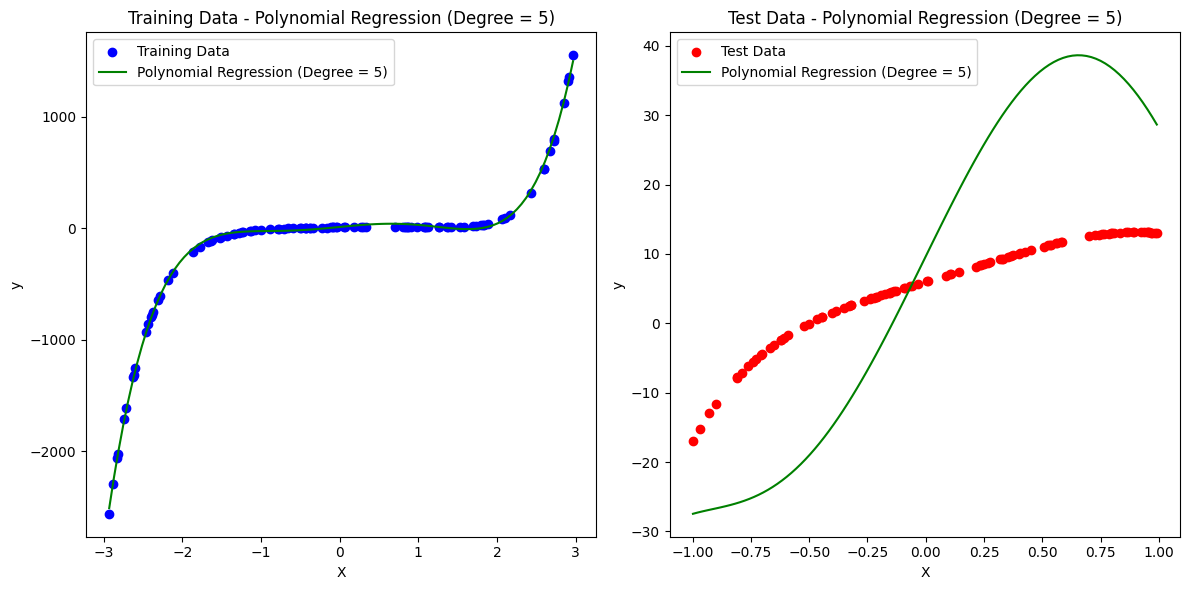

In [17]:
plt.figure(figsize=(12, 6))

# Plot training data with polynomial regression fit
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_poly_train, pred_poly_train, "g-",
         label='Polynomial Regression (Degree = {})'.format(degree))
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data - Polynomial Regression (Degree = {})".format(degree))
plt.legend()

# Plot test data with polynomial regression fit
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_poly_test, pred_poly_test, "g-",
         label='Polynomial Regression (Degree = {})'.format(degree))
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test Data - Polynomial Regression (Degree = {})".format(degree))
plt.legend()

plt.tight_layout()
plt.show()

#### 7th degree

In [18]:
degree=7
polynomial_model = PolynomialRegression(degree)
theta = polynomial_model.train(X_train, y_train)

# Generate predictions for polynomial regression on training data
X_min_train, X_max_train = X_train.min(), X_train.max()
X_poly_train = np.linspace(X_min_train, X_max_train, 100).reshape(-1, 1)
pred_poly_train = polynomial_model.predict(X_poly_train, theta)

# Generate predictions for polynomial regression on test data
X_min_test, X_max_test = X_test.min(), X_test.max()
X_poly_test = np.linspace(X_min_test, X_max_test, 100).reshape(-1, 1)
pred_poly_test = polynomial_model.predict(X_poly_test, theta)

print("Polynomial Equation (Degree = {}) - ".format(degree), theta)

Polynomial Equation (Degree = 7) -  [ 6.00000000e+00  1.00000000e+01 -2.27373675e-11  4.00000000e+00
 -8.00000000e+00  1.39266376e-12 -2.27373675e-13  1.00000000e+00]


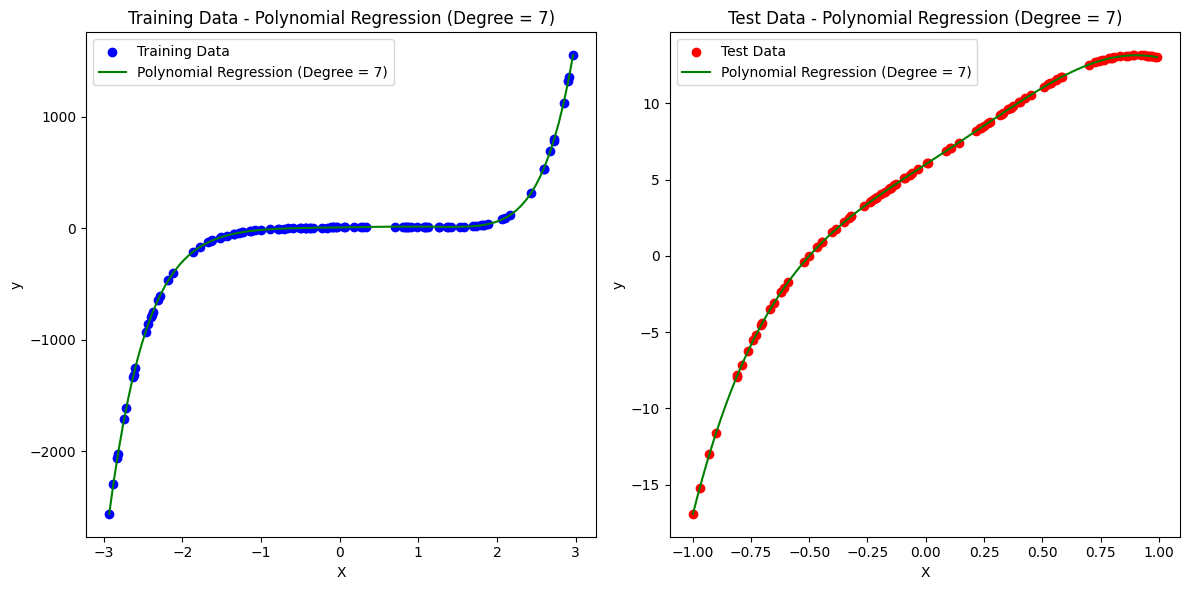

In [19]:
plt.figure(figsize=(12, 6))

# Plot training data with polynomial regression fit
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_poly_train, pred_poly_train, "g-",
         label='Polynomial Regression (Degree = {})'.format(degree))
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data - Polynomial Regression (Degree = {})".format(degree))
plt.legend()

# Plot test data with polynomial regression fit
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_poly_test, pred_poly_test, "g-",
         label='Polynomial Regression (Degree = {})'.format(degree))
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test Data - Polynomial Regression (Degree = {})".format(degree))
plt.legend()

plt.tight_layout()
plt.show()

As you can see, a polynomial of degree 7 fits the data the best.

## Question 2

Import housing data

Installing openpyxl, required for loading Excel files in Pandas dataframes.

In [20]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 5.1 MB/s eta 0:00:00


In [21]:
# Upload the data from the Excel file, Train and Test are separate sheets.
housing_train = pd.read_excel('Housing_data_regression.xlsx', sheet_name='Train')
housing_test = pd.read_excel('Housing_data_regression.xlsx', sheet_name='Test')

# Train
housing_x_train = housing_train.drop(columns=['House ID', 'Price'])
housing_y_train = housing_train['Price']

# Test
housing_x_test = housing_test.drop(columns=['House ID', 'Local Price'])
# Local Price (different name from Price), was not float by default so I had to type cast.
housing_y_test = housing_test['Local Price'].astype('float')

In [22]:
housing_x_train[0:10]

,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,1.0,3.472,0.998,1.0,7,4,42
1,1.0,3.531,1.500,2.0,7,4,62
2,1.0,2.275,1.175,1.0,6,3,40
3,1.0,4.050,1.232,1.0,6,3,54
4,1.0,4.455,1.121,1.0,6,3,42
5,1.0,4.455,0.988,1.0,6,3,56
6,1.0,5.850,1.240,1.0,7,3,51
7,1.0,9.520,1.501,0.0,6,3,32
8,2.5,9.800,3.420,2.0,10,5,42
9,2.5,12.800,3.000,2.0,9,5,14


In [23]:
housing_y_train[0:10]

,Price
0,491760.0
1,502080.0
2,454290.0
3,455730.0
4,505970.0
5,389100.0
6,589800.0
7,560390.0
8,1642020.0
9,1445980.0


Using the simple linear regression model with Housing data

In [24]:
# Train the model
linear_model = LinearRegression()
linear_model.train(housing_x_train, housing_y_train)

# Make predictions
housing_pred_train = linear_model.predict(housing_x_train)
housing_pred_test = linear_model.predict(housing_x_test)

# Calculate Mean Squared Error (MSE)
mse_train = linear_model.mean_squared_error(housing_y_train, housing_pred_train)
mse_test = linear_model.mean_squared_error(housing_y_test, housing_pred_test)

# Print results
print(f"Mean Squared Error (Training Data): {mse_train:.4f}")
print(f"Mean Squared Error (Test Data): {mse_test:.4f}")

Mean Squared Error (Training Data): 5006561505.2044
Mean Squared Error (Test Data): 56870641738.1000


1. The average least squares error using my simple linear regression model is as follows:


*   5006561505.2044 (Training)
*   56870641738.1000 (Testing)



In [27]:
pip install iPython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00


Feature Importance:


,Feature,Coefficient Magnitude
2,Living area,228669.130358
0,Bathrooms,209185.845184
4,# Rooms,113529.579242
3,# Garages,47994.959701
1,Land Area,10192.814903
6,Age of home,-2133.473654
5,# Bedrooms,-151116.118299


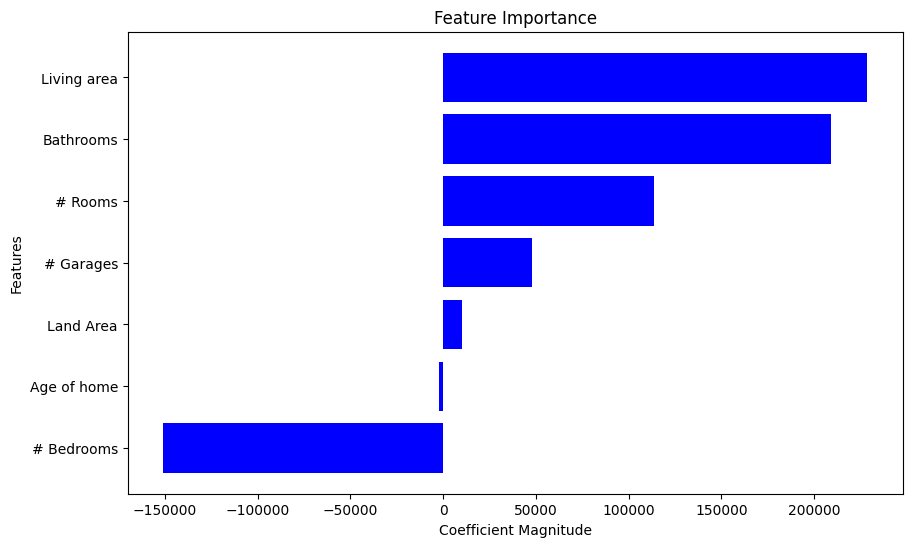

In [34]:
# Create a dataframe using a dictionary pairing the features with their coefficients.
feature_columns = housing_train.drop(columns=['House ID', 'Price']).columns
coefficients = pd.DataFrame({
    "Feature": feature_columns,
     "Coefficient Magnitude": linear_model.weights
})

# Sort them in descending order.
coefficients = coefficients.sort_values(by="Coefficient Magnitude", ascending=False)

# Display the feature importance table.
print("Feature Importance:")
display(coefficients)

# Plot a bar graph for the feature coefficients.
plt.figure(figsize=(10, 6))
plt.barh(coefficients["Feature"],
         coefficients["Coefficient Magnitude"],
         color='blue')

plt.gca().invert_yaxis()
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

2. According to the table and plot above, **Living Area** has the most effect on the final value. By grabbing the the weights for every feature, the coefficient value for Living Area is the greatest in magnitude. The value for this is 228669.13 .

Train the model only using the most significant feature (Living area)

In [35]:
x_train_living = housing_train['Living area']
x_train_living = x_train_living.values.reshape(-1, 1)
y_train_living = housing_train['Price']

x_test_living = housing_test['Living area']
x_test_living = x_test_living.values.reshape(-1, 1)
y_test_living = housing_test['Local Price'].astype('float')

In [39]:
linear_model = LinearRegression()
linear_model.train(x_train_living, y_train_living)

# Make predictions
housing_pred_train = linear_model.predict(x_train_living)
housing_pred_test = linear_model.predict(x_test_living)

# Calculate Mean Squared Error (MSE)
mse_train2 = linear_model.mean_squared_error(y_train_living, housing_pred_train)
mse_test2 = linear_model.mean_squared_error(y_test_living, housing_pred_test)

# Print results
print(f"Comparing MSE when only Living Area feature is used. \n")
print(f"Mean Squared Error (Training Data): {mse_train2:.4f}")
print(f"Mean Squared Error (Test Data): {mse_test2:.4f}")

Comparing MSE when only Living Area feature is used. 

Mean Squared Error (Training Data): 12282616798.3022
Mean Squared Error (Test Data): 93899793656.3500


3. **Age of home** has the least effect on the final value, as its coefficient magnitude is significantly weaker than that of every other feature. The coefficient magnitude for Age of home is 2133.47

Train the model by excluding the least important feature (Age of home)

In [37]:
updated_x_train = housing_train.drop(columns=['House ID', 'Price', 'Age of home'])
updated_y_train = housing_train['Price']

updated_x_test = housing_test.drop(columns=['House ID', 'Local Price', 'Age of home'])
updated_y_test = housing_test['Local Price'].astype('float')

In [41]:
linear_model = LinearRegression()
linear_model.train(updated_x_train, updated_y_train)

# Make predictions
housing_pred_train = linear_model.predict(updated_x_train)
housing_pred_test = linear_model.predict(updated_x_test)

# Calculate Mean Squared Error (MSE)
mse_train3 = linear_model.mean_squared_error(updated_y_train, housing_pred_train)
mse_test3 = linear_model.mean_squared_error(updated_y_test, housing_pred_test)

# Print results
print(f"Comparing MSE after removing Age of home feature. \n")
print(f"Mean Squared Error (Training Data): {mse_train3:.4f}")
print(f"Mean Squared Error (Test Data): {mse_test3:.4f}")

Comparing MSE after removing Age of home feature. 

Mean Squared Error (Training Data): 5318026012.1980
Mean Squared Error (Test Data): 58591058556.9822


### Compare the results from all three models:


*   Default (All Features)
*   Most Significant Feature
*   Removed Least Significant Feature



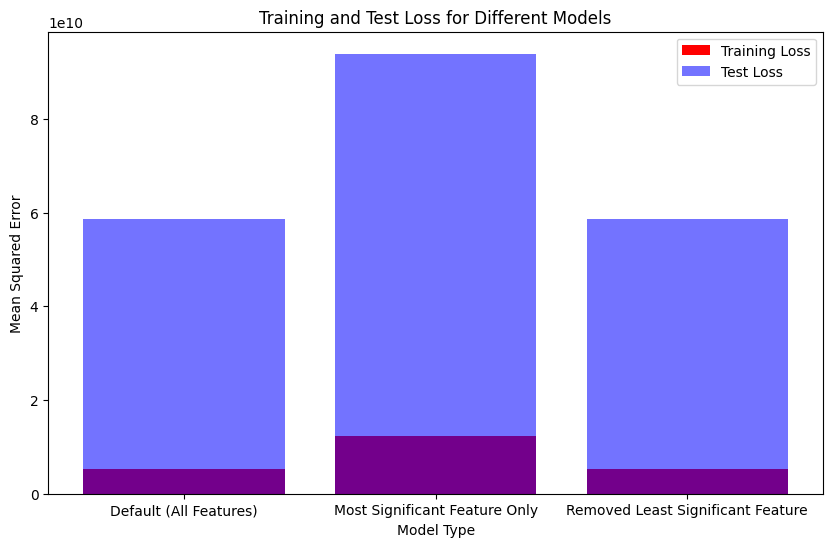

In [59]:
# Bar Graph comparing the losses.

plt.figure(figsize=(10, 6))

training_losses = [mse_train, mse_train2, mse_train3]
test_losses = [mse_test, mse_test2, mse_test3]

features = ['Default (All Features)', 'Most Significant Feature Only', 'Removed Least Significant Feature']

plt.bar(features, training_losses, label='Training Loss', color='red')
plt.bar(features, test_losses, label='Test Loss', color='blue', alpha=0.55)

plt.xlabel('Model Type')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Loss for Different Models')
plt.legend()
plt.show()